In [2]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
# 와인 데이터를 로드한다.
wine = load_wine()
df_features = wine.feature_names

In [3]:
df_data = pd.DataFrame(wine.data, columns = df_features)
df_labels = pd.DataFrame(wine.target, columns = ['label'])
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
data=pd.concat([df_data,df_labels],axis=1)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [34]:
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [35]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [36]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [64]:
#Defining the model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras.models import Model

# 이는 텐서를 반환합니다
inputs = Input(shape=(13,))
x = Dense(10, activation='relu')(inputs)
x2 = Dense(8, activation='relu')(x)
x3 = Dense(6, activation='relu')(x2)
output=Dense(3,activation='softmax')(x3)

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                140       
                                                                 
 dense_73 (Dense)            (None, 7)                 77        
                                                                 
 dense_74 (Dense)            (None, 5)                 40        
                                                                 
 dense_75 (Dense)            (None, 3)                 18        
                                                                 
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


In [65]:
import numpy as np
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
5/5 [==============================] - 0s 35ms/step - loss: 0.6883 - accuracy: 0.6268 - val_loss: 0.5628 - val_accuracy: 0.7778
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.6281 - accuracy: 0.5915 - val_loss: 0.5989 - val_accuracy: 0.5278
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.6186 - accuracy: 0.6408 - val_loss: 0.5525 - val_accuracy: 0.7778
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 0.6190 - accuracy: 0.6549 - val_loss: 0.5429 - val_accuracy: 0.7778
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 0.6112 - accuracy: 0.6549 - val_loss: 0.5762 - val_accuracy: 0.7778
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.6281 - accuracy: 0.5704 - val_loss: 0.5918 - val_accuracy: 0.6389
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 0.6119 - accuracy: 0.6408 - val_loss: 0.5634 - val_accuracy: 0.8056
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 20ms/step - loss: 0.5720 - accuracy: 0.6761 - val_loss: 0.5535 - val_accuracy: 0.7500
Epoch 60/100
5/5 [==============================] - 0s 20ms/step - loss: 0.5592 - accuracy: 0.6901 - val_loss: 0.5493 - val_accuracy: 0.7778
Epoch 61/100
5/5 [==============================] - 0s 20ms/step - loss: 0.5525 - accuracy: 0.7042 - val_loss: 0.5758 - val_accuracy: 0.7500
Epoch 62/100
5/5 [==============================] - 0s 21ms/step - loss: 0.5583 - accuracy: 0.6972 - val_loss: 0.5372 - val_accuracy: 0.7778
Epoch 63/100
5/5 [==============================] - 0s 21ms/step - loss: 0.5605 - accuracy: 0.6972 - val_loss: 0.5380 - val_accuracy: 0.7778
Epoch 64/100
5/5 [==============================] - 0s 21ms/step - loss: 0.5424 - accuracy: 0.6901 - val_loss: 0.5465 - val_accuracy: 0.7222
Epoch 65/100
5/5 [==============================] - 0s 20ms/step - loss: 0.5728 - accuracy: 0.6972 - val_loss: 0.5673 - val_accuracy: 0.7500
Epoch 66/100
5/5 [========

In [66]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.88      0.88      0.88        16
           2       1.00      0.83      0.91         6

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.89      0.89      0.89        36

[[13  1  0]
 [ 2 14  0]
 [ 0  1  5]]


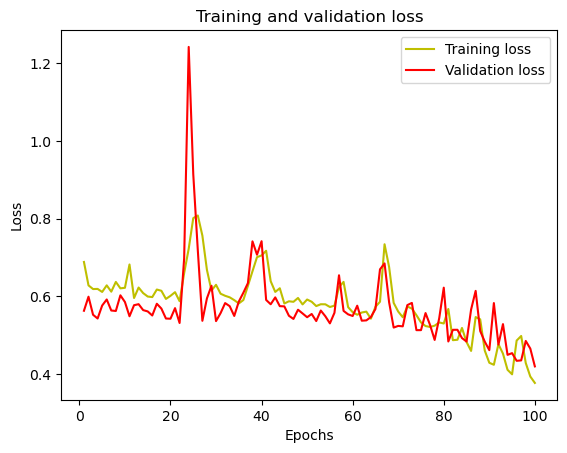

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

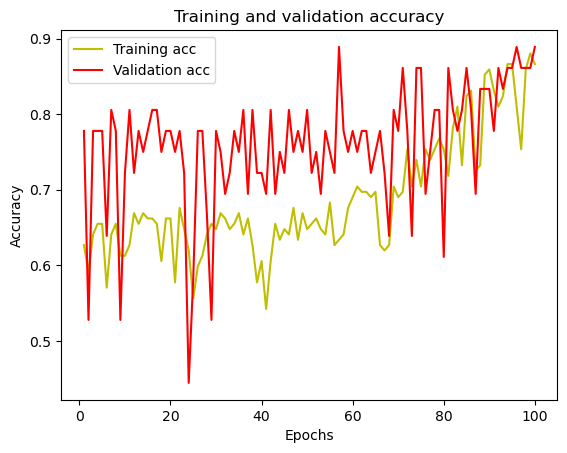

In [68]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()